In [1]:
import pandas as pd

credit = pd.read_csv('https://raw.githubusercontent.com/skathirmani/datasets/master/credit-default.csv')

In [2]:
credit.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,...,real estate,67,none,own,2,1,1,yes,yes,skilled employee
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,2,1,none,yes,skilled employee
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,...,real estate,49,none,own,1,1,2,none,yes,unskilled resident
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,...,building society savings,45,none,for free,1,1,2,none,yes,skilled employee
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,...,unknown/none,53,none,for free,2,2,2,none,yes,skilled employee


In [3]:
credit.columns

Index(['checking_balance', 'months_loan_duration', 'credit_history', 'purpose',
       'amount', 'savings_balance', 'employment_length', 'installment_rate',
       'personal_status', 'other_debtors', 'residence_history', 'property',
       'age', 'installment_plan', 'housing', 'existing_credits', 'default',
       'dependents', 'telephone', 'foreign_worker', 'job'],
      dtype='object')

In [4]:
credit.nunique()

checking_balance          4
months_loan_duration     33
credit_history            5
purpose                  10
amount                  921
savings_balance           5
employment_length         5
installment_rate          4
personal_status           4
other_debtors             3
residence_history         4
property                  4
age                      53
installment_plan          3
housing                   3
existing_credits          4
default                   2
dependents                2
telephone                 2
foreign_worker            2
job                       4
dtype: int64

In [5]:
credit.dtypes

checking_balance        object
months_loan_duration     int64
credit_history          object
purpose                 object
amount                   int64
savings_balance         object
employment_length       object
installment_rate         int64
personal_status         object
other_debtors           object
residence_history        int64
property                object
age                      int64
installment_plan        object
housing                 object
existing_credits         int64
default                  int64
dependents               int64
telephone               object
foreign_worker          object
job                     object
dtype: object

In [6]:
credit.default.value_counts()

1    700
2    300
Name: default, dtype: int64

In [8]:
train = pd.get_dummies(credit.drop('default', axis = 1))
test = credit.default

In [49]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(train, test, test_size = 0.3, random_state = 100)

# DecisionTree

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

base_estimator = DecisionTreeClassifier()
params = {'max_depth':list(range(1,51)), 'criterion':['gini', 'entropy']}
cv_model = GridSearchCV(base_estimator, param_grid = params, cv = 10)
cv_model.fit(train_x, train_y)

print(cv_model.best_params_)

{'criterion': 'gini', 'max_depth': 4}


In [51]:
model_dt = DecisionTreeClassifier(max_depth = 4, criterion = 'gini')
model_dt.fit(train_x, train_y)
predict_dt = model_dt.predict(test_x)

In [52]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(accuracy_score(predict_dt, test_y))
pred_probs_dt = pd.DataFrame(model_dt.predict_proba(test_x), columns = ['Default', 'Not_Default'])

0.6966666666666667


# RandomForest Classifier

In [59]:
from sklearn.ensemble import RandomForestClassifier

params = {'n_estimators':[50, 100, 150, 200, 250, 300, 350], 'criterion':['gini','entropy']}
base_estimator = RandomForestClassifier()
cv_model = GridSearchCV(base_estimator, param_grid = params, cv = 10)
cv_model.fit(train_x, train_y)

print(cv_model.best_params_)

{'criterion': 'gini', 'n_estimators': 200}


In [60]:
model_rf = RandomForestClassifier(n_estimators = 200, criterion = 'gini', random_state = 100)
model_rf.fit(train_x, train_y)
predict_rf = model_rf.predict(test_x)

print(accuracy_score(predict_rf, test_y))
pred_probs_rf = pd.DataFrame(model_rf.predict_proba(test_x), columns = ['Default', 'Not_Default'])

0.7366666666666667


# AdaBoost Classifier

In [61]:
from sklearn.ensemble import AdaBoostClassifier

params = {'n_estimators':[50, 100, 150, 200, 250, 300, 350], 'learning_rate':[1, 2, 3, 4]}
base_estimator = AdaBoostClassifier()
cv_model = GridSearchCV(base_estimator, param_grid = params, cv = 10)
cv_model.fit(train_x, train_y)

print(cv_model.best_params_)

{'learning_rate': 1, 'n_estimators': 50}


In [65]:
model_ada = AdaBoostClassifier(learning_rate = 1, n_estimators = 50, random_state = 100)
model_ada.fit(train_x, train_y)
predict_ada = model_ada.predict(test_x)

print(accuracy_score(predict_ada, test_y))
pred_probs_ada = pd.DataFrame(model_ada.predict_proba(test_x), columns = ['Default', 'Not_Default'])

0.7333333333333333


# KNN

In [64]:
from sklearn.neighbors import KNeighborsClassifier

params = {'n_neighbors':list(range(1,15)), 'weights':['distance', 'uniform']}
base_estimator = KNeighborsClassifier()
cv_model = GridSearchCV(base_estimator, param_grid = params, cv = 10)
cv_model.fit(train_x, train_y)

print(cv_model.best_params_)

{'n_neighbors': 12, 'weights': 'uniform'}


In [66]:
model_knn = KNeighborsClassifier(n_neighbors = 12, weights = 'uniform')
model_knn.fit(train_x, train_y)
predict_knn = model_knn.predict(test_x)

print(accuracy_score(predict_knn, test_y))
pred_probs_knn = pd.DataFrame(model_knn.predict_proba(test_x), columns = ['Default', 'Not_Default'])

0.71


# NaiveBayes

In [67]:
from sklearn.naive_bayes import GaussianNB

model_nb = GaussianNB()
model_nb.fit(train_x, train_y)
predict_nb = model_nb.predict(test_x)

print(accuracy_score(predict_nb, test_y))
pred_probs_nb = pd.DataFrame(model_nb.predict_proba(test_x), columns = ['Default', 'Not_Default'])

0.6833333333333333


# Comparing Different Models

In [68]:
tp, fn, fp, tn = confusion_matrix(test_y, predict_dt).ravel()
accuracy = (tp + tn) / (tn + fp + fn + tp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
metrics = pd.DataFrame({'Decision Tree':[tp, tn, fp, fn, accuracy, sensitivity, specificity]}, 
           index = ['True Negative', 'True Negative', 'False Positive', 'False Negative', 'Accuracy', 'Sensitivity', 'Specificity'])

tp, fn, fp, tn = confusion_matrix(test_y, predict_rf).ravel()
accuracy = (tp + tn) / (tn + fp + fn + tp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
metrics['Random Forest'] = [tp, tn, fp, fn, accuracy, sensitivity, specificity]

tp, fn, fp, tn = confusion_matrix(test_y, predict_ada).ravel()
accuracy = (tp + tn) / (tn + fp + fn + tp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
metrics['AdaBoost'] = [tp, tn, fp, fn, accuracy, sensitivity, specificity]

tp, fn, fp, tn = confusion_matrix(test_y, predict_knn).ravel()
accuracy = (tp + tn) / (tn + fp + fn + tp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
metrics['KNN'] = [tp, tn, fp, fn, accuracy, sensitivity, specificity]

tp, fn, fp, tn = confusion_matrix(test_y, predict_nb).ravel()
accuracy = (tp + tn) / (tn + fp + fn + tp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
metrics['Naive Bayes'] = [tp, tn, fp, fn, accuracy, sensitivity, specificity]



In [69]:
metrics

,Decision Tree,Random Forest,AdaBoost,KNN,Naive Bayes
True Negative,177.000000,196.000000,182.000000,205.000000,161.000000
True Negative,32.000000,25.000000,38.000000,8.000000,44.000000
False Positive,49.000000,56.000000,43.000000,73.000000,37.000000
False Negative,42.000000,23.000000,37.000000,14.000000,58.000000
Accuracy,0.696667,0.736667,0.733333,0.710000,0.683333
Sensitivity,0.808219,0.894977,0.831050,0.936073,0.735160
Specificity,0.395062,0.308642,0.469136,0.098765,0.543210


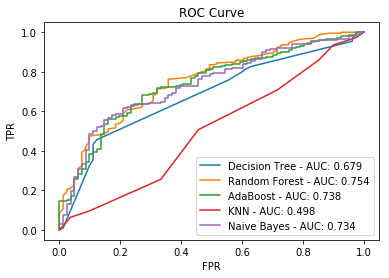

In [71]:
%matplotlib inline

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr_dt, tpr_dt, thresholds_dt = roc_curve(test_y, pred_probs_dt['Default'], pos_label = 1)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(test_y, pred_probs_rf['Default'], pos_label = 1)
fpr_ada, tpr_ada, thresholds_ada = roc_curve(test_y, pred_probs_ada['Default'], pos_label = 1)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(test_y, pred_probs_knn['Default'], pos_label = 1)
fpr_nb, tpr_nb, thresholds_nb = roc_curve(test_y, pred_probs_nb['Default'], pos_label = 1)


auc_dt = auc(fpr_dt, tpr_dt)
auc_rf = auc(fpr_rf, tpr_rf)
auc_ada = auc(fpr_ada, tpr_ada)
auc_knn = auc(fpr_knn, tpr_knn)
auc_nb = auc(fpr_nb, tpr_nb)


plt.plot(fpr_dt, tpr_dt)
plt.plot(fpr_rf, tpr_rf)
plt.plot(fpr_ada, tpr_ada)
plt.plot(fpr_knn, tpr_knn)
plt.plot(fpr_nb, tpr_nb)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(['Decision Tree - AUC: %.3f' % auc_dt,
            'Random Forest - AUC: %.3f' % auc_rf ,
            'AdaBoost - AUC: %.3f' % auc_ada,
            'KNN - AUC: %.3f' % auc_knn,
            'Naive Bayes - AUC: %.3f' % auc_nb])
plt.show()
